In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.style.use('ggplot')

In [2]:
import time
import math

In [3]:
a = 15
b = -5
d = 0.5
r = 0.02
T = 1
k = 100
s0 = 100

In [4]:
h = 0.01
m = 10000

In [5]:
mu=r+d*((a**2-(b+1)**2)**0.5-(a**2-b**2)**0.5)
amb = (a**2-b**2)**0.5

In [9]:
#h = 0.00001
#m = 6000000
U = 60
M = 60000

L = []
H = []

while M < 6060000:
    m = M
    h = U/M
    Xi = np.arange(0+h,(m+1)*h,h)
    phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
    f = -1*phi.imag*2/Xi
    P = (sum(f)-0.5*(f[0]+f[-1]))*h
    res = np.exp(-r*T)*(P/(2*math.pi)+0.5)
    print(M)
    print(res)
    L.append(res)
    H.append(h)
    M += 60000
    

60000
0.46553581021
120000
0.465535721032
180000
0.465535691306
240000
0.465535676443
300000
0.465535667525
360000
0.46553566158
420000
0.465535657333
480000
0.465535654149
540000
0.465535651671
600000
0.46553564969
660000
0.465535648068
720000
0.465535646717
780000
0.465535645574
840000
0.465535644594
900000
0.465535643744
960000
0.465535643001
1020000
0.465535642346
1080000
0.465535641763
1140000
0.465535641241
1200000
0.465535640772
1260000
0.465535640347
1320000
0.465535639961
1380000
0.465535639609
1440000
0.465535639286
1500000
0.465535638988
1560000
0.465535638714
1620000
0.46553563846
1680000
0.465535638224
1740000
0.465535638004
1800000
0.465535637799
1860000
0.465535637607
1920000
0.465535637428
1980000
0.465535637259
2040000
0.4655356371
2100000
0.46553563695
2160000
0.465535636808
2220000
0.465535636674
2280000
0.465535636548
2340000
0.465535636427
2400000
0.465535636313
2460000
0.465535636204
2520000
0.465535636101
2580000
0.465535636002
2640000
0.465535635908
2700000
0.46

In [11]:
plt.plot(L,H)

TypeError: unsupported operand type(s) for /: 'int' and 'list'

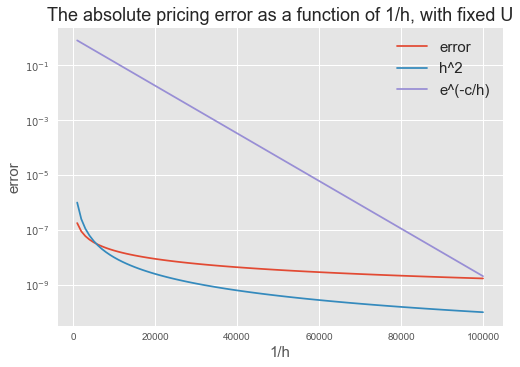

In [113]:
invH = [1/x for x in H]
sqH = [x**2 for x in H]
exH1 = [math.e**(-0.0002/x) for x in H]
exH2 = [math.e**(-1000000/x) for x in H]
errL = [abs(0.465535631934-x) for x in L]
plt.plot(invH,errL, label='error')
plt.plot(invH,sqH, label='h^2')
plt.plot(invH,exH1, label='e^(-c/h)')

plt.yscale('log')
plt.legend(fontsize=15)
plt.title("The absolute pricing error as a function of 1/h, with fixed U", fontsize=18)
plt.xlabel("1/h", fontsize=15)
plt.ylabel("error", fontsize=15)

In [72]:
#h = 0.00001
#m = 6000000
h = 0.00001
M = 60000

L2 = []
u = []

while M < 6060000:
    U = M*h
    m = M
    Xi = np.arange(0+h,(m+1)*h,h)
    phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
    f = -1*phi.imag*2/Xi
    P = (sum(f)-0.5*(f[0]+f[-1]))*h
    res = np.exp(-r*T)*(P/(2*math.pi)+0.5)
    print(M)
    print(res)
    L2.append(res)
    u.append(U)
    M += 60000

60000
0.489981467852
120000
0.489799862531
180000
0.489497493333
240000
0.489029751845
300000
0.488368313391
360000
0.487502780509
420000
0.486440085498
480000
0.485202145139
540000
0.483822097915
600000
0.482340179736
660000
0.480799438974
720000
0.479242228243
780000
0.477707239789
840000
0.47622756247
900000
0.474829565062
960000
0.473532649394
1020000
0.472349381203
1080000
0.471286174983
1140000
0.470344290091
1200000
0.469520850373
1260000
0.468809748675
1320000
0.468202753257
1380000
0.467690275867
1440000
0.467262087026
1500000
0.466907870235
1560000
0.466617636799
1620000
0.466382012422
1680000
0.466192438999
1740000
0.466041237668
1800000
0.465921674041
1860000
0.465827932299
1920000
0.465755049174
1980000
0.46569886477
2040000
0.465655919519
2100000
0.465623378961
2160000
0.465598942053
2220000
0.465580760728
2280000
0.465567365418
2340000
0.465557598764
2400000
0.465550557869
2460000
0.465545544898
2520000
0.465542025522
2580000
0.465539594439
2640000
0.465537947158
2700000

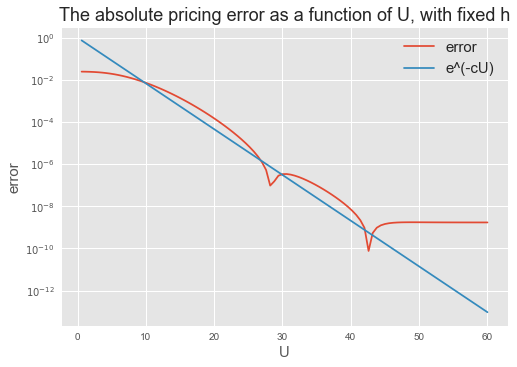

In [115]:
exu = [math.e**(-0.5*x) for x in u]
errL2 = [abs(0.465535631934-x) for x in L2]
plt.plot(u,errL2, label='error')
plt.plot(u,exu, label='e^(-cU)')

plt.yscale('log')
plt.legend(fontsize=15)
plt.title("The absolute pricing error as a function of U, with fixed h", fontsize=18)
plt.xlabel("U", fontsize=15)
plt.ylabel("error", fontsize=15)

In [10]:
-0.15688450895921618/(2*math.pi)+0.5

0.475031054904596

In [12]:
np.exp(-r*T)*(-0.15688450895921618/(2*math.pi)+0.5)

0.46562480979699344

In [7]:
h = 0.000001
m = 60000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456148591
19.935423
-1.37278808017e-12


In [8]:
h = 0.00001
m = 6000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456138313
1.7962880000000006
-1.37278808017e-12


In [9]:
h = 0.000001
m = 10000000

start = time.clock()
Xi = np.arange(m*h+h,(2*m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)

-0.0451748818276
2.7509900000000016


In [86]:
np.arange(m*h+h,(2*m+1)*h,h)

array([ 100.000001  ,  100.000002  ,  100.000003  , ...,  199.99999775,
        199.99999875,  199.99999975])

In [93]:
(-0.157456138313)-(-0.157456148591)

1.0277999978880459e-08

In [95]:
h = 0.0000005
m = 120000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456149165
46.879898
-1.37278808017e-12


In [96]:
(-0.157456149165)-(-0.157456148591)

-5.740000141862822e-10

In [98]:
h = 0.00000025
m = 240000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456149235
135.051473
-1.37278808017e-12


In [99]:
(-0.157456149235)-(-0.157456149165)

-7.000000579182597e-11

In [11]:
r2524 = np.exp(-r*T)*(-0.157456149235/(2*math.pi)+0.5)
r5012 = np.exp(-r*T)*(-0.157456149165/(2*math.pi)+0.5)
print(r2524)
print(r5012)
print(r5012-r2524)

0.465535631934
0.465535631945
1.09202091814e-11


In [102]:
h = 0.00000025
m = 240000000
h*m

60.0

In [13]:
h = 0.00001
m = 6000000
h*m

60.00000000000001

In [14]:
rea = np.exp(-r*T)*(-0.157456148591/(2*math.pi)+0.5)
print(r2524)
print(rea)
print(rea-r2524)

0.465535631934
0.465535632034
1.00466246433e-10


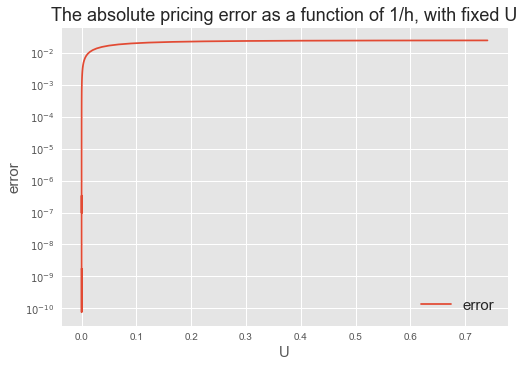

In [93]:
exu = [math.e**(-0.5*x) for x in u]
errL2 = [abs(0.465535631934-x) for x in L2]
plt.plot(exu,errL2, label='error')

plt.yscale('log')
plt.legend(fontsize=15)
plt.title("The absolute pricing error as a function of 1/h, with fixed U", fontsize=18)
plt.xlabel("U", fontsize=15)
plt.ylabel("error", fontsize=15)

In [96]:
h = 0.0000005
m = 120000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456149165
62.60049600000002
-1.37278808017e-12


In [97]:
h = 0.0000005
m = 240000000

start = time.clock()
Xi = np.arange(0+h,(m+1)*h,h)
phi = math.e**(1j*mu*T*Xi-d*T*((a**2-(b+1j*Xi)**2)**0.5-(a**2-b**2)**0.5))
f = -1*phi.imag*2/Xi
res = (sum(f)-0.5*(f[0]+f[-1]))*h
end = time.clock()
print(res)
print(end-start)
print(f[-1])

-0.157456149165
138.26173199999994
5.22495292537e-27
